# CreditOne Classification 
Class 5 Task 3

Digging into SVM KNN RF

#### Import modules

In [3]:
#enable auto complete
%config IPCompleter.greedy=True

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [5]:
#imports
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
#svm
from sklearn import svm
#knn
from sklearn.neighbors import KNeighborsClassifier
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#model metrics
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold


#### import data

In [6]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,4810,500000,1,3,3,53,0,0,0,0,...,125218,126650,114473,12602,11000,4711,6000,11000,10000,0
1,15096,500000,1,1,3,38,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
2,81,470000,2,3,3,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
3,14889,450000,2,1,3,37,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,11072,450000,1,1,3,37,-2,-2,-2,-2,...,317,1614,324,303,5041,1,1622,325,316,0


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
df = rawData

In [9]:
#change to categorical

df.SEX = df.SEX.astype('category')
df.MARRIAGE = df.MARRIAGE.astype('category')
df.AGE = df.AGE.astype('category')
df.EDUCATION = df.EDUCATION.astype('category')

In [10]:
#bin Age data
df['AGE'] = pd.cut(df['AGE'], [20,30,40,50,60,70,80],labels=['20-30','30-40','40-50', '50-60', '60-70','80-70'])

In [11]:
#dummiefy age
AGE_dummies = pd.get_dummies(df['AGE'],prefix = "AGE", columns=None, sparse=False, drop_first=False)

In [12]:
AGE_dummies

,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,AGE_80-70
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


In [13]:
AGE_dummies

,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,AGE_80-70
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


In [14]:
#add age dummies to df and delete age
df=df.join(AGE_dummies)
del df['AGE']

In [15]:
#move default column to end

#make an array of column names
cols = df.columns.tolist()

In [16]:
cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'AGE_20-30',
 'AGE_30-40',
 'AGE_40-50',
 'AGE_50-60',
 'AGE_60-70',
 'AGE_80-70']

In [17]:
#move default to the end
cols.insert(-1, cols.pop(cols.index('default payment next month')))
cols
df=df[cols]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1       

In [19]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,default payment next month,AGE_80-70
0,4810,500000,1,3,3,0,0,0,0,0,...,6000,11000,10000,0,0,0,1,0,0,0
1,15096,500000,1,1,3,-2,-2,-2,-2,-2,...,0,0,0,0,1,0,0,0,1,0
2,81,470000,2,3,3,0,0,0,0,0,...,960,1000,3000,0,1,0,0,0,0,0
3,14889,450000,2,1,3,1,-2,-2,-2,-2,...,0,0,0,0,1,0,0,0,0,0
4,11072,450000,1,1,3,-2,-2,-2,-2,-2,...,1622,325,316,0,1,0,0,0,0,0


In [20]:
df.shape

(30000, 30)

### Select Features


#### Remove low variance features

In [21]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df)

array([[  4.81000000e+03,   5.00000000e+05,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.50960000e+04,   5.00000000e+05,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  8.10000000e+01,   4.70000000e+05,   2.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.65820000e+04,   2.00000000e+04,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.15600000e+04,   2.00000000e+04,   2.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.39000000e+03,   1.00000000e+04,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [22]:
df.shape

(30000, 30)

## Correlation Matrix

In [23]:
c = df.corr().abs()

In [24]:
s = c.unstack()
so = s.sort_values(kind="quicksort")

print (so)

#corrMat = df.corr().abs
#print(corrMat)

PAY_AMT4                    AGE_80-70                     0.000081
AGE_80-70                   PAY_AMT4                      0.000081
                            PAY_AMT5                      0.000103
PAY_AMT5                    AGE_80-70                     0.000103
PAY_AMT3                    AGE_80-70                     0.000422
AGE_80-70                   PAY_AMT3                      0.000422
                            PAY_6                         0.000475
PAY_6                       AGE_80-70                     0.000475
ID                          PAY_AMT5                      0.000652
PAY_AMT5                    ID                            0.000652
AGE_50-60                   ID                            0.000923
ID                          AGE_50-60                     0.000923
PAY_3                       PAY_AMT1                      0.001295
PAY_AMT1                    PAY_3                         0.001295
BILL_AMT4                   AGE_50-60                     0.00

In [25]:
del df['BILL_AMT1']
del df['BILL_AMT2']
del df['BILL_AMT3']
del df['BILL_AMT4']
del df['BILL_AMT5']


In [26]:
del df['PAY_0']
del df['PAY_2']
del df['PAY_3']
del df['PAY_4']
del df['PAY_5']


In [27]:
df.shape


(30000, 20)

In [28]:
#features
features = df.iloc[:,1:19]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,default payment next month
0,500000,1,3,3,0,114473,12602,11000,4711,6000,11000,10000,0,0,0,1,0,0
1,500000,1,1,3,-2,0,0,0,0,0,0,0,0,1,0,0,0,1
2,470000,2,3,3,0,29889,6400,7566,3000,960,1000,3000,0,1,0,0,0,0
3,450000,2,1,3,-2,0,0,0,0,0,0,0,0,1,0,0,0,0
4,450000,1,1,3,-2,324,303,5041,1,1622,325,316,0,1,0,0,0,0


#### Select Dependent Variable

In [29]:
#dependent variable
depVar = df['default payment next month']

In [30]:
depVar.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
PAY_6                         30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
AGE_20-30                     30000 non-null uint8
AGE_30-40                     30000 non-null uint8
AGE_40-50                     30000 non-null uint8
AGE_50-60                     30000 non-null uint8
AGE_60-70      

### Establish Training Data


In [32]:
#run split
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.30, random_state =123)
print("X_train",X_train.shape,'\n',"X_test", X_test.shape,'\n',"y_train", y_train.shape,'\n',"y_test", y_test.shape)

X_train (21000, 18) 
 X_test (9000, 18) 
 y_train (21000,) 
 y_test (9000,)


# SVM
http://scikit-learn.org/stable/modules/svm.html#classification

SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

In [35]:
SVMclf = svm.SVC()

In [36]:
# train a model on the training set
SVMclf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
# class prediction for the testing set
SVMclf_pred = SVMclf.predict(X_test)

In [38]:
print(" ***Support Vector Machine***","\n","accuracy",skm.accuracy_score(y_test, SVMclf_pred),'\n',"average_precision_score",skm.average_precision_score(y_test, SVMclf_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, SVMclf_pred),'\n','Precission Score',skm.precision_score(y_test,SVMclf_pred))

 ***Support Vector Machine*** 
 accuracy 0.786111111111 
 average_precision_score 0.253201372985 
 Kappa 0.0652324751997 
 Precission Score 0.908163265306


In [39]:
confusion_SVM =skm. confusion_matrix(y_test, SVMclf_pred)
print(confusion_SVM)

# 0: negative class (doesn't have default status)
# 1: positive class (has default status)


#        Pr_0  Pr_1
# Act_0   TN    FP 
# Act_1   FN    TP

[[6986    9]
 [1916   89]]


# SVM **TUNED**
http://scikit-learn.org/stable/modules/svm.html#classification

SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [ ]:
svc = svm.SVC()

In [ ]:
SVM_clf = GridSearchCV(svc, parameters)

In [ ]:
SVM_clf.fit(X_train, y_train)

In [ ]:
sorted(SVM_clf.cv_results_.keys())

In [ ]:
SVM_clf_pred = SVM_clf.predict(X_test)

In [ ]:
print(" ***Support Vector Machine TUNED***","\n","accuracy",skm.accuracy_score(y_test, SVM_clf_pred),'\n',"average_precision_score",skm.average_precision_score(y_test, SVM_clf_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, SVM_clf_pred),'\n','Precission Score',skm.precision_score(y_test,SVM_clf_pred))

# K-Nearest Neighbor Classifier **TUNED**

http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
KNNT = KNeighborsClassifier()

In [35]:
# check the parameters

KNNT.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [77]:
neigh=[1,10,20,30,40,50]
leafs=[15,30,45]

In [78]:
parameters = {'n_neighbors':neigh, 'leaf_size':leafs}

In [38]:
KNNTclf = GridSearchCV(KNNT, parameters, cv = 10, scoring = 'accuracy')

In [46]:
KNN=KNNTclf.fit(X_train, y_train)
print(KNN)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 10, 20, 30, 40, 50], 'leaf_size': [15, 30, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [48]:
KNNTclf.get_params()

{'cv': 10,
 'error_score': 'raise',
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': 1,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'leaf_size': [15, 30, 45],
  'n_neighbors': [1, 10, 20, 30, 40, 50]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': 'accuracy',
 'verbose': 0}

In [53]:
KNNTclf_pred = KNNTclf.predict(X_test)

In [54]:
print(" ***K-Nearest Neighbor Classifier***","\n","accuracy",skm.accuracy_score(y_test, KNNTclf_pred),'\n',"average_precision_score",skm.average_precision_score(y_test, KNNTclf_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, KNNTclf_pred),'\n','Precision Score',skm.precision_score(y_test,KNNTclf_pred))

 ***K-Nearest Neighbor Classifier*** 
 accuracy 0.781888888889 
 average_precision_score 0.245590468274 
 Kappa 0.0712840849833 
 Precision Score 0.607142857143


### Confusion Matrix

Confusion matrix will reveal the pattern, as it describes the performance of a classification model.

Gives a more complete picture of how a classifier is performing

In [56]:
confusion_KNN = skm.confusion_matrix(y_test, KNNTclf_pred)
print(confusion_KNN)

# 0: negative class (doesn't have default status)
# 1: positive class (has default status)


#        Pr_0  Pr_1
# Act_0   TN    FP 
# Act_1   FN    TP

[[6918   77]
 [1886  119]]


#### Metrics 

**Classification accuracy:** overall, how often is the classifier correct?  

In [57]:
print(skm.accuracy_score(y_test, KNNTclf_pred))

0.781888888889


**Classification error:** overall, how often is the classifier incorrect? (Misclasification Rate)

In [58]:
print(1 - skm.accuracy_score(y_test, KNNTclf_pred))

0.218111111111


**Sensitivity:** when the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances? ("Recall" or "True Positive Rate")

In [59]:
print(skm.recall_score(y_test, KNNTclf_pred))

0.0593516209476


**Specificity:** when the actual value is negative, how often is the prediction correct?

This classifier is highly specific but not highly sensitive, in fact is not sensitive at all

In [60]:
TN_KNN = confusion_KNN[0, 0]
FP_KNN = confusion_KNN[0, 1]

print(TN_KNN / float(FP_KNN + TN_KNN))

0.988992137241


Interpretation: the Linear Regression model is highly specific but not sensitive

**False positive rate:** when the actual value is negative, how often is the prediction correct?

In [62]:
print(FP_KNN / float(TN_KNN + FP_KNN))

0.0110078627591


**Precision:** when a positive value is predicted, how often is the prediction correct?

In [213]:
print(skm.precision_score(y_test, KNNTclf_pred))

0.607142857143


Summary

In [66]:
print(" ***KNN***" ,'\n',
      "Accuracy",skm.accuracy_score(y_test, KNNTclf_pred),'\n',
      "Kappa",skm.cohen_kappa_score(y_test, KNNTclf_pred),'\n',
      "Sensitivity",skm.recall_score(y_test, KNNTclf_pred),'\n',
      'Specificity',TN_KNN/float(FP_KNN + TN_KNN),'\n',
      "Precision",skm.precision_score(y_test, KNNTclf_pred),'\n',
      "False Positive Rate",FP_KNN/float(TN_KNN + FP_KNN))

 ***KNN*** 
 Accuracy 0.781888888889 
 Kappa 0.0712840849833 
 Sensitivity 0.0593516209476 
 Specificity 0.988992137241 
 Precision 0.607142857143 
 False Positive Rate 0.0110078627591


In [158]:
KNNTclf.grid_scores_
#KNNTclf.cv_results_

[mean: 0.70867, std: 0.00587, params: {'leaf_size': 15, 'n_neighbors': 1},
 mean: 0.78224, std: 0.00526, params: {'leaf_size': 15, 'n_neighbors': 10},
 mean: 0.78362, std: 0.00358, params: {'leaf_size': 15, 'n_neighbors': 20},
 mean: 0.78276, std: 0.00241, params: {'leaf_size': 15, 'n_neighbors': 30},
 mean: 0.78295, std: 0.00233, params: {'leaf_size': 15, 'n_neighbors': 40},
 mean: 0.78219, std: 0.00196, params: {'leaf_size': 15, 'n_neighbors': 50},
 mean: 0.70857, std: 0.00594, params: {'leaf_size': 30, 'n_neighbors': 1},
 mean: 0.78229, std: 0.00494, params: {'leaf_size': 30, 'n_neighbors': 10},
 mean: 0.78362, std: 0.00359, params: {'leaf_size': 30, 'n_neighbors': 20},
 mean: 0.78290, std: 0.00242, params: {'leaf_size': 30, 'n_neighbors': 30},
 mean: 0.78305, std: 0.00232, params: {'leaf_size': 30, 'n_neighbors': 40},
 mean: 0.78224, std: 0.00193, params: {'leaf_size': 30, 'n_neighbors': 50},
 mean: 0.70852, std: 0.00534, params: {'leaf_size': 45, 'n_neighbors': 1},
 mean: 0.78210,

In [159]:
# there is one tuple for each trial of CV
# examine the first tuple 

print('PARAMETERS','\n',KNNTclf.grid_scores_[0].parameters,'\n','\n',
'Validation Scores','\n',KNNTclf.grid_scores_[0].cv_validation_scores,'\n','\n',
'Mean Validation:',KNNTclf.grid_scores_[0].mean_validation_score)

PARAMETERS 
 {'leaf_size': 15, 'n_neighbors': 1} 
 
 Validation Scores 
 [ 0.71537363  0.71428571  0.70857143  0.7147619   0.71380952  0.70666667
  0.70761905  0.70428571  0.70571429  0.69556932] 
 
 Mean Validation: 0.708666666667


In [160]:
# best model

print(KNNTclf.best_score_)
print(KNNTclf.best_params_)
print(KNNTclf.best_estimator_)

0.783619047619
{'leaf_size': 15, 'n_neighbors': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


In [211]:
#Extract mean accuracy from grid_scors
#scores = [x[1] for x in KNNTclf.grid_scores_]

#make array with just leaf = 15 mean accuracy scores for range of plot 1
leaf_15=scores[0:6]
#make array with just leaf = 30 mean accuracy scores for range of plot 2
leaf_30=scores[6:12]
#make array with just leaf = 45 mean accuracy scores for range of plot 2
leaf_45=scores[12:]

#Make an array with k values for domain of plot
k=neigh


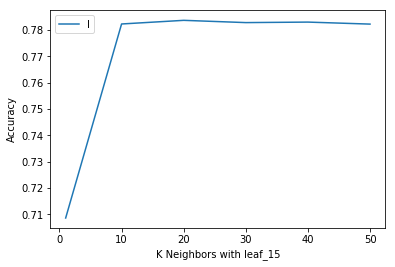

In [212]:
#scores = np.array(scores).reshape(len(k_range), len(weight_options))
plt.plot(k, leaf_15)
plt.legend("leaf_15")
plt.xlabel('K Neighbors with leaf_15')
plt.ylabel('Accuracy')
plt.show()

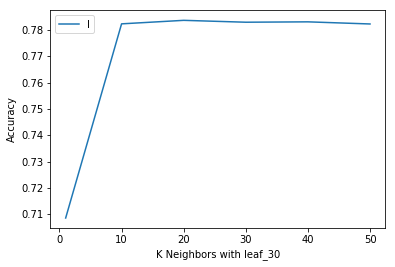

In [209]:
#scores = np.array(scores).reshape(len(k_range), len(weight_options))
plt.plot(k, leaf_30)
plt.legend("leaf_30")
plt.xlabel('K Neighbors with leaf_30')
plt.ylabel('Accuracy')
plt.show()

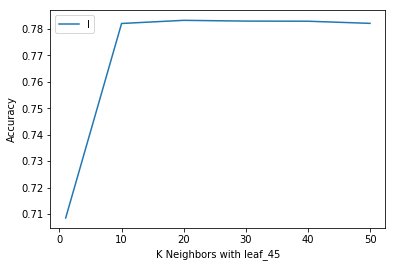

In [210]:
#scores = np.array(scores).reshape(len(k_range), len(weight_options))
plt.plot(k, leaf_45)
plt.legend("leaf_45")
plt.xlabel('K Neighbors with leaf_45')
plt.ylabel('Accuracy')
plt.show()

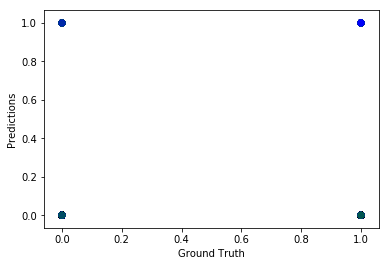

In [215]:
#plt.scatter(features_test, depVar_test,  color='black')
plt.scatter(y_test, KNNTclf_pred, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

#### Train/test split

In [141]:
modelKNN_par = KNeighborsClassifier(n_neighbors = 10, leaf_size=15)  
KNN = modelKNN_par.fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [142]:
KNN_pred = KNN.predict(X_test)

In [143]:
confusion_KNN = skm.confusion_matrix(y_test, KNN_pred)
print(confusion_KNN)

[[6851  144]
 [1835  170]]


In [144]:
TN_KNN = confusion_KNN[0, 0]
FP_KNN = confusion_KNN[0, 1]

In [145]:
print(" ***K-Nearest Neighbors***" ,'\n',
      "Accuracy",skm.accuracy_score(y_test, KNN_pred),'\n',
      "Kappa",skm.cohen_kappa_score(y_test, KNN_pred),'\n',
      "Sensitivity",skm.recall_score(y_test, KNN_pred),'\n',
      'Specificity',TN_KNN/float(FP_KNN + TN_KNN),'\n',
      "Precision",skm.precision_score(y_test, KNN_pred),'\n',
      "False Positive Rate",FP_KNN/float(TN_KNN + FP_KNN))

 ***K-Nearest Neighbors*** 
 Accuracy 0.780111111111 
 Kappa 0.0918250487205 
 Sensitivity 0.0847880299252 
 Specificity 0.979413867048 
 Precision 0.541401273885 
 False Positive Rate 0.0205861329521


# Random Forest

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [91]:
RFclf = RandomForestClassifier(max_depth=4, random_state=0)

In [92]:
RFclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [93]:
RFclf_pred = RFclf.predict(X_test)

In [94]:
print(" ***Random Forest***" ,'\n',"accuracy",skm.accuracy_score(y_test, RFclf_pred),'\n',"average_precision_score",skm.average_precision_score(y_test, RFclf_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, RFclf_pred),'\n','Precision Score',skm.precision_score(y_test,RFclf_pred))

 ***Random Forest*** 
 accuracy 0.971444444444 
 average_precision_score 0.900376004433 
 Kappa 0.913589305248 
 Precision Score 1.0


In [95]:
print(RFclf.feature_importances_)

[  1.61198324e-02   6.85405903e-04   9.68943479e-04   1.25374074e-03
   1.04045748e-01   5.53290150e-03   1.69080764e-02   1.89982896e-02
   9.05778105e-03   1.89357508e-02   9.58467496e-03   4.02380099e-03
   8.60904483e-05   0.00000000e+00   0.00000000e+00   2.09164333e-04
   0.00000000e+00   7.93589800e-01]


In [96]:
confusion_RF = skm.confusion_matrix(y_test, RFclf_pred)
print(confusion_RF)
# 0: negative class (doesn't have default status)
# 1: positive class (has default status)


#        Pr_0  Pr_1
# Act_0   TN    FP 
# Act_1   FN    TP

[[6995    0]
 [ 257 1748]]


In [97]:
print(cross_val_score(RFclf, X_train, y_train))
RFclf.score(X_train, y_train)

[ 0.96414798  0.98571429  0.9815688 ]


0.9744761904761905

In [98]:
# Feature importance

print(RFclf.feature_importances_)

[  1.61198324e-02   6.85405903e-04   9.68943479e-04   1.25374074e-03
   1.04045748e-01   5.53290150e-03   1.69080764e-02   1.89982896e-02
   9.05778105e-03   1.89357508e-02   9.58467496e-03   4.02380099e-03
   8.60904483e-05   0.00000000e+00   0.00000000e+00   2.09164333e-04
   0.00000000e+00   7.93589800e-01]


In [99]:
RFclf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# Linear SVC
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

In [126]:
lin_clf = svm.LinearSVC()

In [127]:
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [128]:
lin_clf_pred = lin_clf.predict(X_test)

In [ ]:
print(" ***Linear SVC***" ,'\n',"accuracy",skm.accuracy_score(y_test, lin_clf_pred),'\n',"average_precision_score",skm.average_precision_score(y_test, lin_clf_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, lin_clf_pred),'\n','Precision Score',skm.precision_score(y_test,lin_clf_pred))

 ***Linear SVC*** 
 accuracy 0.258333333333 
 average_precision_score 0.2189449576 
 Kappa -0.0106483559447 
 Precision Score 0.218539054966


# Accuracy

In [ ]:
SVMscores = cross_val_score(SVMclf, X_train, y_train, cv=15)
RFscores = cross_val_score(RFclf, X_train, y_train, cv=15)
KNNscores = cross_val_score(KNNclf, X_train, y_train, cv=15)

In [ ]:
LINscores = cross_val_score(lin_clf, X_train, y_train, cv=15)

In [ ]:
print(" SVM Accuracy: %0.2f (+/- %0.2f)" % (SVMscores.mean(), SVMscores.std() * 2),
    '\n',"KNN Accuracy: %0.2f (+/- %0.2f)" % (KNNscores.mean(), KNNscores.std() * 2),
    '\n', "RF Accuracy: %0.2f (+/- %0.2f)" % (RFscores.mean(), RFscores.std() * 2),
    '\n',"LinSVC Accuracy: %0.2f (+/- %0.2f)" % (LINscores.mean(), LINscores.std() * 2))

In [ ]:
print(" LINscores","\n",LINscores,"\n",
"SVMscores","\n",
      SVMscores,"\n",
"SRscores","\n",
      RFscores,"\n",
"KNNscores","\n",
      KNNscores)

## Making Predictions

# Tuning